In [14]:
import pandas as pd

DATA_PATH = "LoLesports_data/"

df = pd.read_csv(f"{DATA_PATH}base_data.csv", low_memory=False)
df.drop(columns=["datacompleteness", "url", "year", "teamid", "playerid"], inplace=True) # "LCK", "LEC", "LCS", "PCS", "VCS", "CBLOL", "WLDs", "MSI"

# df.loc[df["teamname"] == "DWG KIA", "teamname"] = "Dplus KIA"
# df.loc[df["teamname"] == "Liiv SANDBOX", "teamname"] = "BNK FEARX" 
# df.loc[df["teamname"].isin(["Fredit BRION", "BRION"]), "teamname"] = "OKSavingsBank Brion"
# df.loc[df["teamname"] == "Victory Five", "teamname"] = "Ninjas in Pyjamas"
# df.loc[df["teamname"] == "MAD Lions", "teamname"] = "MAD Lions KOI"
# df.loc[df["teamname"] == "Excel Esports", "teamname"] = "GiantX"
# df.loc[df["teamname"].isin(["Rogue", "KOI"]), "teamname"] = "Rogue"
# df.loc[df["teamname"].isin(["Counter Logic Gaming", "NRG"]), "teamname"] = "NRG Kia"
# df.loc[df["teamname"] == "Hurricane Gaming", "teamname"] = "Dewish Team"
# df.loc[df["teamname"] == "Meta Falcon Team", "teamname"] = "HELL PIGS"
# df.loc[df["teamname"].isin(["SEM9", "SEM9 WPE", "WP Gaming"]), "teamname"] = "West Point Esports"
# df.loc[df["teamname"] == "Luxury Esports", "teamname"] = "Team Whales"
# df.loc[df["teamname"] == "Saigon Buffalo", "teamname"] = "MGN Vikings Esports"
# df.loc[df["teamname"] == "MGN Box Esports", "teamname"] = "MGN Blue Esports"
# df.loc[df["teamname"].isin(["Flamengo Esports", "Flamengo Los Grandes"]), "teamname"] = "Los Grandes"
# df.loc[df["teamname"] == "KaBuM! e-Sports", "teamname"] = "KaBuM! Esports"
# df.loc[df["teamname"] == "Netshoes Miners", "teamname"] = "Miners"

# df = df[~df["teamname"].isin([
#     "Dino Gaming",
#     "Original Gaming",
#     "APOLLO GAMING", 
#     "CYRUS",
#     "Burst The Sky Esports",
#     "Nate9527"
# ])]

train = df[(df["patch"] >= 12.01) & (df["patch"] <= 14.05)]
test = df[df["patch"] >= 14.06]

train.shape, test.shape

((82296, 156), (18708, 156))

# 팀, 선수 데이터 분리

In [3]:
teams_train = train[train["position"] == "team"].reset_index(drop=True)
players_train = train[train["position"] != "team"].reset_index(drop=True)

teams_test = test[test["position"] == "team"].reset_index(drop=True)
players_test = test[test["position"] != "team"].reset_index(drop=True)

teams_train.shape, players_train.shape, teams_test.shape, players_test.shape

((13716, 156), (68580, 156), (3118, 156), (15590, 156))

In [4]:
teams_train.head()

,gameid,league,split,playoffs,date,game,patch,participantid,side,position,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,8401-8401_game_1,LPL,Spring,0,2022-01-10 9:24,1,12.01,100,Blue,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8401-8401_game_1,LPL,Spring,0,2022-01-10 9:24,1,12.01,200,Red,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8401-8401_game_2,LPL,Spring,0,2022-01-10 10:09,2,12.01,100,Blue,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8401-8401_game_2,LPL,Spring,0,2022-01-10 10:09,2,12.01,200,Red,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8402-8402_game_1,LPL,Spring,0,2022-01-10 11:26,1,12.01,100,Blue,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 결측치 처리

## 팀 데이터 결측치 처리

In [78]:
drop_teams_cols = [
    "playername",
    "playerid", 
    "position",
    "champion",
    "firstbloodkill",
    "firstbloodassist",
    "firstbloodvictim",
    "damageshare",
    "dragons (type unknown)",
    "earnedgoldshare",
    "total cs",
    "goldat20",
    "xpat20",
    "csat20",
    "opp_goldat20",
    "opp_xpat20",
    "opp_csat20",
    "golddiffat20",
    "xpdiffat20",
    "csdiffat20",
    "killsat20",
    "assistsat20",
    "deathsat20",
    "opp_killsat20",
    "opp_assistsat20",
    "opp_deathsat20",
    "goldat25",
    "xpat25",
    "csat25",
    "opp_goldat25",
    "opp_xpat25",
    "opp_csat25",
    "golddiffat25",
    "xpdiffat25",
    "csdiffat25",
    "killsat25",
    "assistsat25",
    "deathsat25",
    "opp_killsat25",
    "opp_assistsat25",
    "opp_deathsat25",
    "monsterkillsownjungle",
    "monsterkillsenemyjungle",
]

fill_zero_cols = [
    "game",
    "elementaldrakes",
    "opp_elementaldrakes",
    "chemtechs",
    "hextechs",
    "void_grubs",
    "opp_void_grubs",
    "turretplates",
    "opp_turretplates",
    "quadrakills",
    "pentakills",
    "heralds",
    "opp_heralds",
    "firstblood",
    "firstdragon",
    "dragons",
    "opp_dragons",
    "infernals",
    "mountains",
    "clouds",
    "oceans",
    "elders",
    "opp_elders",
    "firstherald",
    "firstbaron",
    "barons",
    "opp_barons",
    "firsttower",
    "firstmidtower",
    "inhibitors",
    "opp_inhibitors",
]

fill_unknown_cols = [
    "gameid",
    "teamname",
    "teamid",
    "ban1",
    "ban2",
    "ban3",
    "ban4",
    "ban5",
    "pick1",
    "pick2",
    "pick3",
    "pick4",
    "pick5",
    "split",
]

teams_train.drop(columns=drop_teams_cols, inplace=True)
teams_train[fill_zero_cols] = teams_train[fill_zero_cols].fillna(0)
teams_train[fill_unknown_cols] = teams_train[fill_unknown_cols].fillna("unknown")

In [79]:
missing_columns = teams_train.columns[teams_train.isnull().sum() > 0]
null_samples = teams_train[teams_train[missing_columns].isnull().any(axis=1)]

for idx, row in null_samples.iterrows():
    team_history = teams_train[
        (teams_train["teamid"] == row["teamid"])
        & (teams_train["gameid"] < row["gameid"])
    ].sort_values("gameid", ascending=False)

    for col in missing_columns:
        if pd.isnull(row[col]):
            prev_5_mean = team_history[col].head(5).mean()
            if pd.notnull(prev_5_mean):
                teams_train.loc[idx, col] = prev_5_mean
            else:
                teams_train.loc[idx, col] = teams_train[col].mean()

In [80]:
teams_train.shape

(13716, 115)

In [81]:
teams_train.isnull().sum().sum()

0

In [82]:
teams_test.drop(columns=drop_teams_cols, inplace=True)
teams_test[fill_zero_cols] = teams_test[fill_zero_cols].fillna(0)
teams_test[fill_unknown_cols] = teams_test[fill_unknown_cols].fillna("unknown")

missing_columns = teams_test.columns[teams_test.isnull().sum() > 0]
null_samples = teams_test[teams_test[missing_columns].isnull().any(axis=1)]

for idx, row in null_samples.iterrows():
    team_history = teams_test[
        (teams_test["teamid"] == row["teamid"])
        & (teams_test["gameid"] < row["gameid"])
    ].sort_values("gameid", ascending=False)

    for col in missing_columns:
        if pd.isnull(row[col]):
            prev_5_mean = team_history[col].head(5).mean()
            if pd.notnull(prev_5_mean):
                teams_test.loc[idx, col] = prev_5_mean
            else:
                teams_test.loc[idx, col] = teams_test[col].mean()

teams_test.shape

(3118, 115)

In [83]:
teams_test.isnull().sum().sum()

0

## 선수 데이터 결측치 처리

In [51]:
players_train.shape, players_test.shape

((69170, 158), (15590, 158))

In [52]:
drop_players_cols = [
    "pick1",
    "pick2",
    "pick3",
    "pick4",
    "pick5",
    "firstdragon",
    "dragons",
    "opp_dragons",
    "dragons (type unknown)",
    "elementaldrakes",
    "opp_elementaldrakes",
    "infernals",
    "mountains",
    "clouds",
    "oceans",
    "chemtechs",
    "hextechs",
    "elders",
    "opp_elders",
    "firstherald",
    "heralds",
    "opp_heralds",
    "void_grubs",
    "opp_void_grubs",
    "firstbaron",
    "firsttower",
    "towers",
    "opp_towers",
    "firstmidtower",
    "firsttothreetowers",
    "turretplates",
    "opp_turretplates",
    "gspd",
    "gpr",
    "goldat20",
    "xpat20",
    "csat20",
    "opp_goldat20",
    "opp_xpat20",
    "opp_csat20",
    "golddiffat20",
    "xpdiffat20",
    "csdiffat20",
    "killsat20",
    "assistsat20",
    "deathsat20",
    "opp_killsat20",
    "opp_assistsat20",
    "opp_deathsat20",
    "goldat25",
    "xpat25",
    "csat25",
    "opp_goldat25",
    "opp_xpat25",
    "opp_csat25",
    "golddiffat25",
    "xpdiffat25",
    "csdiffat25",
    "killsat25",
    "assistsat25",
    "deathsat25",
    "opp_killsat25",
    "opp_assistsat25",
    "opp_deathsat25",
    "monsterkillsownjungle",
    "monsterkillsenemyjungle",
]

fill_zero_cols = [
    "game",
    "barons",
    "opp_barons",
    "quadrakills",
    "pentakills",
    "firstblood",
    "firstbloodkill",
    "firstbloodassist",
    "firstbloodvictim",
    "inhibitors",
    "opp_inhibitors",
]

fill_unknown_cols = [
    "split",
    "ban1",
    "ban2",
    "ban3",
    "ban4",
    "ban5",
    "gameid",
    "playername",
    "playerid",
    "teamname",
    "teamid",
]

players_train.drop(columns=drop_players_cols, inplace=True)
players_train[fill_zero_cols] = players_train[fill_zero_cols].fillna(0)
players_train[fill_unknown_cols] = players_train[fill_unknown_cols].fillna("unknown")

In [53]:
missing_columns = players_train.columns[players_train.isnull().sum() > 0]
null_samples = players_train[players_train[missing_columns].isnull().any(axis=1)]

for idx, row in null_samples.iterrows():
    player_history = players_train[
        (players_train["playerid"] == row["playerid"])
        & (players_train["gameid"] < row["gameid"])
    ].sort_values("gameid", ascending=False)

    for col in missing_columns:
        if pd.isnull(row[col]):
            prev_5_mean = player_history[col].head(5).mean()
            if pd.notnull(prev_5_mean):
                players_train.loc[idx, col] = prev_5_mean
            else:
                players_train.loc[idx, col] = players_train[col].mean()

players_train.shape

(69170, 92)

In [54]:
players_train.isna().sum().sum()

0

In [55]:
players_test.drop(columns=drop_players_cols, inplace=True)
players_test[fill_zero_cols] = players_test[fill_zero_cols].fillna(0)
players_test[fill_unknown_cols] = players_test[fill_unknown_cols].fillna("unknown")

missing_columns = players_test.columns[players_test.isnull().sum() > 0]
null_samples = players_test[players_test[missing_columns].isnull().any(axis=1)]

for idx, row in null_samples.iterrows():
    player_history = players_test[
        (players_test["playerid"] == row["playerid"])
        & (players_test["gameid"] < row["gameid"])
    ].sort_values("gameid", ascending=False)

    for col in missing_columns:
        if pd.isnull(row[col]):
            prev_5_mean = player_history[col].head(5).mean()
            if pd.notnull(prev_5_mean):
                players_test.loc[idx, col] = prev_5_mean
            else:
                players_test.loc[idx, col] = players_test[col].mean()

players_test.shape

KeyboardInterrupt: 

# 컬럼 추가

## 상대 팀 추가

In [34]:
temp_opp_teams = teams_train.groupby("gameid")["teamid"].transform(lambda x: x.iloc[::-1].values).to_frame("opp_teamid")
teams_train = pd.concat([teams_train, temp_opp_teams], axis=1)
temp_opp_teams = teams_test.groupby("gameid")["teamid"].transform(lambda x: x.iloc[::-1].values).to_frame("opp_teamid")
teams_test = pd.concat([teams_test, temp_opp_teams], axis=1)

temp_opp_players = players_train.groupby("gameid")["teamid"].transform(lambda x: x.iloc[::-1].values).to_frame("opp_teamid")
players_train = pd.concat([players_train, temp_opp_players], axis=1)
temp_opp_players = players_test.groupby("gameid")["teamid"].transform(lambda x: x.iloc[::-1].values).to_frame("opp_teamid")
players_test = pd.concat([players_test, temp_opp_players], axis=1)

## 날짜 추가

In [35]:
teams_train["date"] = pd.to_datetime(teams_train["date"])
teams_test["date"] = pd.to_datetime(teams_test["date"])

players_train["date"] = pd.to_datetime(players_train["date"])
players_test["date"] = pd.to_datetime(players_test["date"])

teams_train["year"] = teams_train["date"].dt.year
teams_train["month"] = teams_train["date"].dt.month
teams_train["day"] = teams_train["date"].dt.day

players_train["year"] = players_train["date"].dt.year
players_train["month"] = players_train["date"].dt.month
players_train["day"] = players_train["date"].dt.day

teams_test["year"] = teams_test["date"].dt.year
teams_test["month"] = teams_test["date"].dt.month
teams_test["day"] = teams_test["date"].dt.day

players_test["year"] = players_test["date"].dt.year
players_test["month"] = players_test["date"].dt.month
players_test["day"] = players_test["date"].dt.day

# teams_train.drop(columns=["date"], inplace=True)
# players_train.drop(columns=["date"], inplace=True)

# teams_test.drop(columns=["date"], inplace=True)
# players_test.drop(columns=["date"], inplace=True)

## 데이터 타입 변경

In [36]:
teams_train["league"] = teams_train["league"].astype("category")
teams_train["split"] = teams_train["split"].astype("category")
teams_train["teamid"] = teams_train["teamid"].astype("category")
teams_train["opp_teamid"] = teams_train["opp_teamid"].astype("category")

teams_test["league"] = teams_test["league"].astype("category")
teams_test["split"] = teams_test["split"].astype("category")
teams_test["teamid"] = teams_test["teamid"].astype("category")
teams_test["opp_teamid"] = teams_test["opp_teamid"].astype("category")

players_train["league"] = players_train["league"].astype("category")
players_train["split"] = players_train["split"].astype("category")
players_train["teamid"] = players_train["teamid"].astype("category")
players_train["playerid"] = players_train["playerid"].astype("category")
players_train["opp_teamid"] = players_train["opp_teamid"].astype("category")

players_test["league"] = players_test["league"].astype("category")
players_test["split"] = players_test["split"].astype("category")
players_test["teamid"] = players_test["teamid"].astype("category")
players_test["playerid"] = players_test["playerid"].astype("category")
players_test["opp_teamid"] = players_test["opp_teamid"].astype("category")

# 특성 추가

## df에 포함되어 있는 특성을 이용한 토대 작성

In [37]:
pre_game_features = [
    "patch",
    "side",
    "league",
    "teamid",
    "opp_teamid",
    "ban1",
    "ban2",
    "ban3",
    "ban4",
    "ban5",
    "pick1",
    "pick2",
    "pick3",
    "pick4",
    "pick5",
    "year",
    "month",
    "day",
]

train_input = teams_train[pre_game_features]
train_output = teams_train["result"]

test_input = teams_test[pre_game_features]
test_output = teams_test["result"]

train_input.shape, train_output.shape, test_input.shape, test_output.shape

((9976, 18), (9976,), (2156, 18), (2156,))

### 팀별 최근 승률 계산, 상대팀 최근 승률 계산

In [38]:
# 팀별 최근 승률 계산을 위한 데이터 정렬
teams_train = teams_train.sort_values(['teamid', 'year', 'month', 'day'])
teams_test = teams_test.sort_values(['teamid', 'year', 'month', 'day'])

# 팀별 이동 평균 승률 계산 (최근 10경기)
teams_train['recent10_winrate'] = teams_train.groupby('teamid', observed=True)['result'].transform(
    lambda x: x.rolling(window=10, min_periods=1).mean().shift(1)
)

teams_test['recent10_winrate'] = teams_test.groupby('teamid', observed=True)['result'].transform(
    lambda x: x.rolling(window=10, min_periods=1).mean().shift(1)
)

# 상대팀 최근 승률 계산
teams_train['opp_recent10_winrate'] = teams_train.merge(
    teams_train[['teamid', 'year', 'month', 'day', 'recent10_winrate']], 
    left_on=['opp_teamid', 'year', 'month', 'day'],
    right_on=['teamid', 'year', 'month', 'day'],
    suffixes=('', '_opp')
)['recent10_winrate_opp']

teams_test['opp_recent10_winrate'] = teams_test.merge(
    teams_test[['teamid', 'year', 'month', 'day', 'recent10_winrate']], 
    left_on=['opp_teamid', 'year', 'month', 'day'],
    right_on=['teamid', 'year', 'month', 'day'],
    suffixes=('', '_opp')
)['recent10_winrate_opp']

# NaN값을 0.5로 대체 (첫 경기인 경우)
teams_train['recent10_winrate'] = teams_train['recent10_winrate'].fillna(0.5)
teams_test['recent10_winrate'] = teams_test['recent10_winrate'].fillna(0.5)
teams_train['opp_recent10_winrate'] = teams_train['opp_recent10_winrate'].fillna(0.5)
teams_test['opp_recent10_winrate'] = teams_test['opp_recent10_winrate'].fillna(0.5)

# 특성 리스트에 recent_winrate와 opp_recent_winrate 추가
pre_game_features.extend(['recent10_winrate', 'opp_recent10_winrate'])

# 입력 데이터 업데이트
train_input = teams_train[pre_game_features]
test_input = teams_test[pre_game_features]

In [39]:
train_input.head()

,patch,side,league,teamid,opp_teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,year,month,day,recent10_winrate,opp_recent10_winrate
6638,13.12,Blue,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:f7c0f545d3fc1860239d04b3ebe97f8,Annie,Renekton,Jax,Nautilus,Rakan,Jayce,Maokai,Irelia,Ezreal,Karma,2023,7,2,0.500000,0.9
6726,13.12,Blue,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:b41d715b166da7092724123264e4560,Jax,Ivern,Renekton,Lucian,Aphelios,Tristana,Sejuani,Kai'Sa,Nautilus,Akali,2023,7,7,1.000000,0.6
6770,13.12,Blue,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:957a0b20bb6ce6491d39eb82e5fcb17,Azir,Jax,Quinn,Rell,Alistar,Tristana,LeBlanc,Gragas,Viego,Nautilus,2023,7,8,0.500000,0.7
6807,13.12,Red,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:0916b3c324c8577b0c6344f3e067f62,Kai'Sa,LeBlanc,Tristana,Aphelios,Varus,Jax,Sejuani,Xayah,Ahri,Lulu,2023,7,9,0.333333,0.8
6877,13.12,Red,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:215b3bc4217842708191cc9be161132,Neeko,LeBlanc,Tristana,Alistar,Jax,Jayce,Rell,Xayah,Nidalee,Sion,2023,7,14,0.250000,0.7


### 역대 맞대결 승률

In [40]:
# 팀별 맞대결 승률 계산
def calculate_h2h_winrate(df):
    h2h_stats = {}
    for _, row in df.iterrows():
        team = row['teamid']
        opp = row['opp_teamid']
        result = row['result']
        
        if (team, opp) not in h2h_stats:
            h2h_stats[(team, opp)] = {'wins': 0, 'total': 0}
            
        h2h_stats[(team, opp)]['total'] += 1
        if result == 1:
            h2h_stats[(team, opp)]['wins'] += 1
            
    return h2h_stats

# 훈련 데이터로 맞대결 통계 계산
h2h_stats = calculate_h2h_winrate(teams_train)

# 맞대결 승률을 계산하는 함수
def get_h2h_winrate(team, opp, stats):
    if (team, opp) in stats:
        record = stats[(team, opp)]
        return record['wins'] / record['total']
    return 0.5  # 첫 맞대결인 경우 0.5 반환

# 훈련 데이터와 테스트 데이터에 맞대결 승률 추가
teams_train['h2h_winrate'] = teams_train.apply(
    lambda x: get_h2h_winrate(x['teamid'], x['opp_teamid'], h2h_stats), axis=1
)

teams_test['h2h_winrate'] = teams_test.apply(
    lambda x: get_h2h_winrate(x['teamid'], x['opp_teamid'], h2h_stats), axis=1
)

# 특성 리스트에 h2h_winrate 추가
pre_game_features.append('h2h_winrate')

# 입력 데이터 업데이트
train_input = teams_train[pre_game_features]
test_input = teams_test[pre_game_features]

In [41]:
train_input.head()

,patch,side,league,teamid,opp_teamid,ban1,ban2,ban3,ban4,ban5,...,pick2,pick3,pick4,pick5,year,month,day,recent10_winrate,opp_recent10_winrate,h2h_winrate
6638,13.12,Blue,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:f7c0f545d3fc1860239d04b3ebe97f8,Annie,Renekton,Jax,Nautilus,Rakan,...,Maokai,Irelia,Ezreal,Karma,2023,7,2,0.500000,0.9,1.000000
6726,13.12,Blue,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:b41d715b166da7092724123264e4560,Jax,Ivern,Renekton,Lucian,Aphelios,...,Sejuani,Kai'Sa,Nautilus,Akali,2023,7,7,1.000000,0.6,0.142857
6770,13.12,Blue,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:957a0b20bb6ce6491d39eb82e5fcb17,Azir,Jax,Quinn,Rell,Alistar,...,LeBlanc,Gragas,Viego,Nautilus,2023,7,8,0.500000,0.7,0.000000
6807,13.12,Red,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:0916b3c324c8577b0c6344f3e067f62,Kai'Sa,LeBlanc,Tristana,Aphelios,Varus,...,Sejuani,Xayah,Ahri,Lulu,2023,7,9,0.333333,0.8,0.250000
6877,13.12,Red,PCS,oe:team:0092987a7da75e9fd0cbf8110d10b76,oe:team:215b3bc4217842708191cc9be161132,Neeko,LeBlanc,Tristana,Alistar,Jax,...,Rell,Xayah,Nidalee,Sion,2023,7,14,0.250000,0.7,1.000000


# 인코딩

In [65]:
teams_train["side"] = teams_train["side"].map({"Blue": 0, "Red": 1})
teams_test["side"] = teams_test["side"].map({"Blue": 0, "Red": 1})

players_train["side"] = players_train["side"].map({"Blue": 0, "Red": 1})
players_test["side"] = players_test["side"].map({"Blue": 0, "Red": 1})

In [24]:
from sklearn.preprocessing import LabelEncoder

champion_columns_players = ['champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5']
champion_columns_teams = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']

champions = pd.concat([
    players_train[champion_columns_players],
    teams_train[champion_columns_teams],
    players_test[champion_columns_players],
    teams_test[champion_columns_teams],
]).stack().unique()

champions_df = pd.DataFrame({'champion': champions})
champions_df = champions_df.dropna().reset_index(drop=True)

le = LabelEncoder()
champions_df['champion_encoded'] = le.fit_transform(champions_df['champion'])

for col in champion_columns_players:
    players_train[col] = le.transform(players_train[col])
    players_test[col] = le.transform(players_test[col])

for col in champion_columns_teams:
    teams_train[col] = le.transform(teams_train[col])
    teams_test[col] = le.transform(teams_test[col])

In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
players_train[ohe.get_feature_names_out()] = ohe.fit_transform(players_train[["position"]]).toarray()
players_test[ohe.get_feature_names_out()] = ohe.transform(players_test[["position"]]).toarray()

players_train.drop(columns=["position"], inplace=True)
players_test.drop(columns=["position"], inplace=True)

In [26]:
teams_train.select_dtypes("object").columns, players_train.select_dtypes("object").columns

(Index(['gameid', 'teamname'], dtype='object'),
 Index(['gameid', 'playername', 'teamname'], dtype='object'))

# 스케일링

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
players_train[players_train.select_dtypes("number").columns] = scaler.fit_transform(players_train[players_train.select_dtypes("number").columns])
players_test[players_test.select_dtypes("number").columns] = scaler.transform(players_test[players_test.select_dtypes("number").columns])

teams_train[teams_train.select_dtypes("number").columns] = scaler.fit_transform(teams_train[teams_train.select_dtypes("number").columns])
teams_test[teams_test.select_dtypes("number").columns] = scaler.transform(teams_test[teams_test.select_dtypes("number").columns])

# 모델 학습 및 검증

In [28]:
pre_game_features = [
    "patch",
    "side",
    "league",
    "teamid",
    "opp_teamid",
    "ban1",
    "ban2",
    "ban3",
    "ban4",
    "ban5",
    "pick1",
    "pick2",
    "pick3",
    "pick4",
    "pick5",
    "year",
    "month",
    "day",
]

In [29]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

teams_train['result'] = (teams_train['result'] > 0).astype(int)
teams_test['result'] = (teams_test['result'] > 0).astype(int)

cutoff_patch = teams_train["patch"].quantile(0.8)
train_games = teams_train[teams_train["patch"] < cutoff_patch]["gameid"].unique()
valid_games = teams_train[teams_train["patch"] >= cutoff_patch]["gameid"].unique()

train_x = teams_train[teams_train["gameid"].isin(train_games)][pre_game_features]
valid_x = teams_train[teams_train["gameid"].isin(valid_games)][pre_game_features]

train_y = teams_train[teams_train["gameid"].isin(train_games)]["result"]
valid_y = teams_train[teams_train["gameid"].isin(valid_games)]["result"]

cat_features = list(train_x.select_dtypes("category").columns)
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=3,
    cat_features=cat_features,
    verbose=100
)
catboost.fit(train_x, train_y)

pred_train = catboost.predict(train_x)
pred_valid = catboost.predict(valid_x)

print("\n훈련 정확도:", accuracy_score(train_y, pred_train))
print("검증 정확도:", accuracy_score(valid_y, pred_valid))

print("\n검증 세트 상세 성능:")
print(classification_report(valid_y, pred_valid))

0:	learn: 0.6897761	total: 186ms	remaining: 3m 6s
100:	learn: 0.6346734	total: 2.96s	remaining: 26.3s
200:	learn: 0.6282777	total: 6.19s	remaining: 24.6s
300:	learn: 0.6221378	total: 9.38s	remaining: 21.8s
400:	learn: 0.6173083	total: 12.4s	remaining: 18.5s
500:	learn: 0.6131648	total: 15.5s	remaining: 15.4s
600:	learn: 0.6098661	total: 18.5s	remaining: 12.3s
700:	learn: 0.6063461	total: 21.5s	remaining: 9.19s
800:	learn: 0.6031108	total: 24.6s	remaining: 6.11s
900:	learn: 0.5999129	total: 27.6s	remaining: 3.03s
999:	learn: 0.5964604	total: 30.6s	remaining: 0us

훈련 정확도: 0.7263557917595291
검증 정확도: 0.5850995504174695

검증 세트 상세 성능:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      4673
           1       0.58      0.59      0.59      4669

    accuracy                           0.59      9342
   macro avg       0.59      0.59      0.59      9342
weighted avg       0.59      0.59      0.59      9342



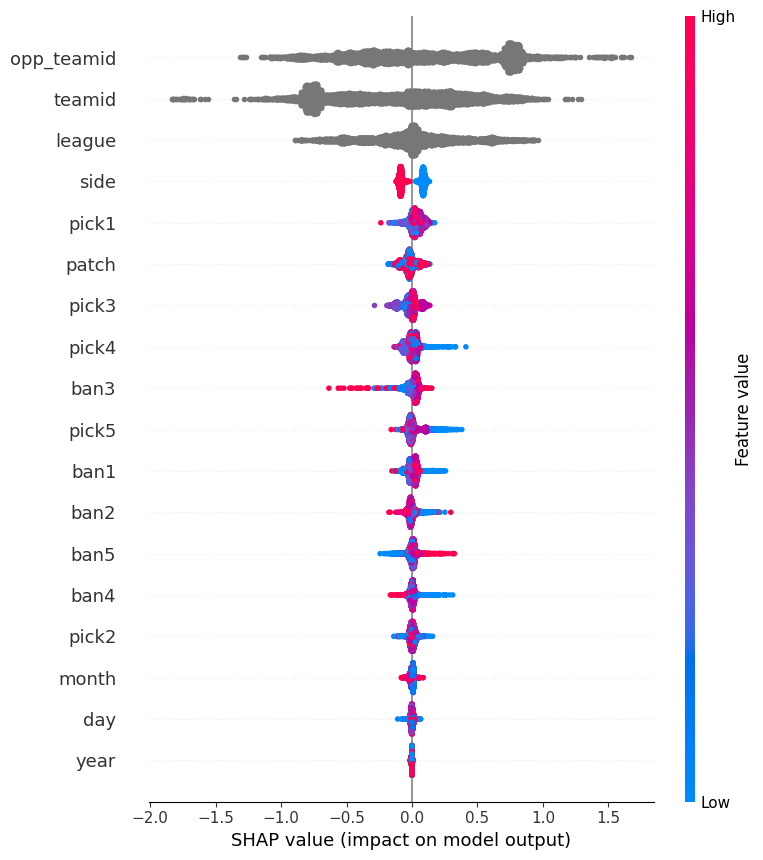

In [30]:
import shap

explainer = shap.TreeExplainer(catboost)
shap_values = explainer.shap_values(valid_x)

shap.summary_plot(shap_values, valid_x)